<a href="https://colab.research.google.com/github/Qu1nnD/CS290/blob/main/TeamFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import math
from sklearn.model_selection import train_test_split

In [ ]:
shrooms = pd.read_csv("https://raw.githubusercontent.com/Qu1nnD/CS290/main/data/mushroom_cleaned.csv")
shrooms.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [ ]:
shrooms.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
shrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
target="class"
features = shrooms.columns[shrooms.columns != "class"]
features = features[features != "season"]
features

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color'],
      dtype='object')

In [ ]:
attribute = "gill-color"

In [ ]:
vals = shrooms[ attribute].unique()
vals

array([10,  5,  7,  9,  0,  3, 11,  8,  1,  6,  4,  2])

In [ ]:
props = shrooms[ shrooms[attribute] == vals[11] ][target].value_counts( normalize=True )
props

,proportion
class,
1,0.63741
0,0.36259


In [ ]:
def Attribute_selection_method(dataset, target, string):
  features = dataset.columns[dataset.columns != target]
  entropys=[]
  for attribute in features:
    entropy = 0
    overall = len( dataset )
    if(string=="entropy"):
      for val in vals:
        if(len(dataset[attribute].unique())<20):
         subset_size = len(dataset[ dataset[attribute] == val ])
         weight = subset_size / overall
         props = dataset[ dataset[attribute] == val ][target].value_counts( normalize=True )
         for p in props.array:
          entropy =  entropy - weight*(p*math.log2(p))
      else:
        entropy = 0
        left = dataset[ dataset[attribute] <= val ][ [attribute,target] ]
        props = left[ target ].value_counts( normalize = True )
        weight = len( left ) / overall
        for prop in props.array:
          entropy = entropy - weight*prop*math.log2( prop )
        right = dataset[ dataset[attribute] > val ][ [attribute,target] ]
        props = right[ target ].value_counts( normalize = True )
        weight = len( right ) / overall
        for prop in props.array:
          entropy = entropy - weight*prop*math.log2( prop )
        entropys.append(entropy)
    else:
      entropy = 1 - sum([p ** 2 for p in props])
      entropy += weight * entropy
      entropys.append(entropy)
  minEnt=min(entropys)
  ind=entropys.index(minEnt)
  return features[ind]

In [ ]:
Attribute_selection_method(shrooms,"class","entropy")

'stem-width'

In [ ]:
train_set, test_set = train_test_split(shrooms, test_size=0.2)

In [ ]:
train_set.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [ ]:
train_set = train_set[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'class']]

In [ ]:
test_set = test_set[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color', 'class']]

In [ ]:
X_train = train_set[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color']]
y_train = train_set["class"]

In [ ]:
X_test = test_set[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color']]
y_test = test_set["class"]

In [ ]:
cat_attributes=[]
num_attributes=[]
for col in X_train.columns:
  if len(X_train[col].unique()) < 20:
    cat_attributes.append(col)
  else:
    num_attributes.append(col)
cat_attributes

['cap-shape', 'gill-attachment', 'gill-color', 'stem-color']

In [ ]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [ ]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])


In [ ]:
cv_scores=cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')
cv_scores

array([0.67013648, 0.66562572, 0.68019894, 0.65355697, 0.68039329])

In [ ]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cap-shape',
                                                   'gill-attachment',
                                                   'gill-color',
                                                   'stem-color'])])),
                ('clf', DecisionTreeClassifier(max_depth=3))])

In [ ]:
predictions = pipeline.predict( X_test )
cm = confusion_matrix( y_test, predictions )
cm

array([[3779, 1127],
       [2302, 3599]])

[Text(0.5, 0.875, 'x[2] <= -0.411\ngini = 0.495\nsamples = 43228\nvalue = [19454, 23774]'),
 Text(0.25, 0.625, 'x[1] <= 0.04\ngini = 0.429\nsamples = 18496\nvalue = [5760, 12736]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[40] <= 0.5\ngini = 0.485\nsamples = 11442\nvalue = [4734, 6708]'),
 Text(0.0625, 0.125, 'gini = 0.451\nsamples = 8137\nvalue = [2794, 5343]'),
 Text(0.1875, 0.125, 'gini = 0.485\nsamples = 3305\nvalue = [1940.0, 1365.0]'),
 Text(0.375, 0.375, 'x[20] <= 0.5\ngini = 0.249\nsamples = 7054\nvalue = [1026, 6028]'),
 Text(0.3125, 0.125, 'gini = 0.188\nsamples = 6567\nvalue = [689, 5878]'),
 Text(0.4375, 0.125, 'gini = 0.426\nsamples = 487\nvalue = [337, 150]'),
 Text(0.75, 0.625, 'x[1] <= 1.32\ngini = 0.494\nsamples = 24732\nvalue = [13694, 11038]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 2.047\ngini = 0.485\nsamples = 21431\nvalue = [12560, 8871]'),
 Text(0.5625, 0.125, 'gini = 0.476\nsamples = 20016\nvalue = [12211, 7805]'),
 Text(0.6875,

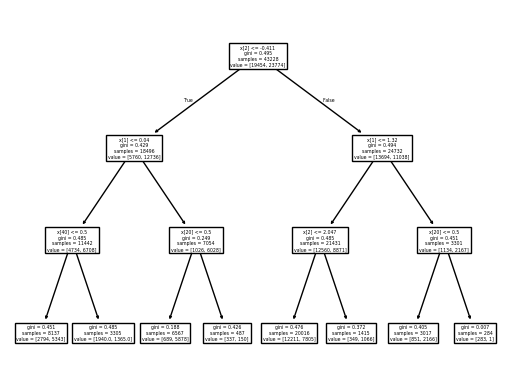

In [ ]:
plot_tree( pipeline.named_steps['clf'])